In [ ]:
#chi square test>>>>
#data preprocessing
#scaling>>>>minmax,standard , robust
#normalization>>>>
#encoding>>>> get dummies, label encoder, one hot encoding

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns


In [93]:
df=pd.read_csv('students.csv')

In [94]:
df.head()

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


In [59]:
#goodness of fit   >>>to check whether a variable is likely to come in a specific dist.
#independence >>>> association b/w two cat variables

Q. Find whether there is equal proportion of males and females in university?

In [60]:
#hypothesis
null_hypo="Proportion is same"
alt_hypo="Proportion is not same"

In [61]:
#samples =500
df["gender"]

1       Female
2       Female
3       Female
4         Male
5       Female
         ...  
8235      Male
8236      Male
8237    Female
8238      Male
8239    Female
Name: gender, Length: 8239, dtype: object

In [96]:
df.shape

(8239, 16)

In [83]:
df.dropna(inplace= True)

In [84]:
pd.crosstab(df["gender"].sample(n=500,random_state=1),df["gender"].sample(n=500,random_state=1))

gender,Female,Male
gender,,
Female,193,0
Male,0,307


In [85]:
# 270 + 230 = 500 (sample size)

In [86]:
#alpha
alpha=0.05

In [87]:
#p = 1-alpha/2
p=1-alpha/2
dof=1
from scipy.stats import chi2, chisquare
chi2.ppf(p,dof)

5.023886187314888

In [90]:
stat,p_value=chisquare([193,307],[250,250])

In [91]:
p_value

3.4283506780566255e-07

In [92]:
stat

25.992

**Q1. Problem Statement: Data Pre-Processing (Categorical data)**

You are given a dataset – “hotel_bookings.csv.” The dataset has a high number of null and  elements that need to be cleansed;  Your job is to create a separate DataFrame with only categorical columns and  perform the  following operations:


1.	Find the number of null values in each column of the new DataFrame

2.	Replace the null values with mode 

3.	In the "hotel" column, replace the hotel names with "0" and "1" based on the condition that – if, "hotel" = "city_hotel", then "hotel" = "1";  else, "0"

4.	Using the label encoder, assign a unique country code to each country

5.	Using onehot encoder, encode the “month” column



In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
df = pd.read_csv("C:\\Users\\alok\\Desktop\\Inzint\\datasets\\hotel_bookings.csv")

# Create a separate DataFrame with only categorical columns
categorical_df = df.select_dtypes(include=['object'])

# 1. Find the number of null values in each column of the new DataFrame
null_counts = categorical_df.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

# 2. Replace the null values with mode
categorical_df.fillna(categorical_df.mode().iloc[0], inplace=True)

# 3. In the "hotel" column, replace the hotel names with "0" and "1"
categorical_df['hotel'] = categorical_df['hotel'].apply(lambda x: 1 if x == 'city_hotel' else 0)

# 4. Using the label encoder, assign a unique country code to each country
label_encoder = LabelEncoder()
categorical_df['country'] = label_encoder.fit_transform(categorical_df['country'])

# 5. Using onehot encoder, encode the “month” column
onehot_encoder = OneHotEncoder(sparse=False)
month_encoded = onehot_encoder.fit_transform(categorical_df[['arrival_date_month']])
month_encoded_df = pd.DataFrame(month_encoded, columns=['month_' + str(i) for i in range(month_encoded.shape[1])])
categorical_df = pd.concat([categorical_df, month_encoded_df], axis=1)

# Display the modified DataFrame
print("Modified DataFrame with categorical columns:")
print(categorical_df.head())


Number of null values in each column:
hotel                        0
arrival_date_month           0
meal                         0
country                    488
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64
Modified DataFrame with categorical columns:
   hotel arrival_date_month meal  country market_segment distribution_channel  \
0      0               July   BB      135         Direct               Direct   
1      0               July   BB      135         Direct               Direct   
2      0               July   BB       59         Direct               Direct   
3      0               July   BB       59      Corporate            Corporate   
4      0               July   BB       59      Online TA                TA/TO   

  reserved_room_type assigned_room_type depos

c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Q2. Problem Statement: Data Pre-Processing (Exponential data)**

Create a DataFrame to store exponential data using the NumPy np.random.exponential() (size=1000) function, and perform the following operations:

1.	Using the minmax_scaling() function, scale the data between 0 to 1, and plot the original data and scaled data using the Seaborn library 

2.	Using preprocessing.normalize() function, normalize the data, and plot the original data and normalized data using the Seaborn library


c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


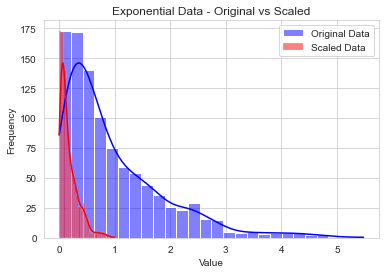

c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


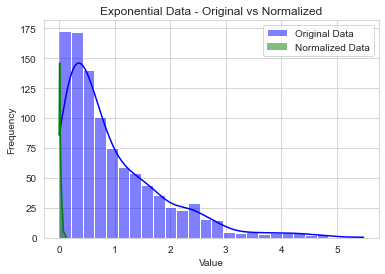

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import minmax_scale, normalize
import matplotlib.pyplot as plt

# 1. Create a DataFrame to store exponential data using np.random.exponential() function
exponential_data = np.random.exponential(size=1000)
exponential_df = pd.DataFrame(exponential_data, columns=['Original Data'])

# Scale the data between 0 and 1 using minmax_scaling()
scaled_data = minmax_scale(exponential_data)
scaled_df = pd.DataFrame(scaled_data, columns=['Scaled Data'])

# Plot the original data and scaled data using Seaborn
sns.set_style("whitegrid")
sns.histplot(data=exponential_df, x='Original Data', kde=True, color='blue', alpha=0.5, label='Original Data')
sns.histplot(data=scaled_df, x='Scaled Data', kde=True, color='red', alpha=0.5, label='Scaled Data')
plt.title('Exponential Data - Original vs Scaled')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2. Normalize the data using preprocessing.normalize()
normalized_data = normalize(exponential_data.reshape(1, -1))
normalized_df = pd.DataFrame(normalized_data.reshape(-1, 1), columns=['Normalized Data'])

# Plot the original data and normalized data using Seaborn
sns.histplot(data=exponential_df, x='Original Data', kde=True, color='blue', alpha=0.5, label='Original Data')
sns.histplot(data=normalized_df, x='Normalized Data', kde=True, color='green', alpha=0.5, label='Normalized Data')
plt.title('Exponential Data - Original vs Normalized')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
